# Gerry William Nanlohy / 2440018854 / LB01 / COMP7116001 - Computer Vision / MID

***Import the required libraries***

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math
from google.colab.patches import cv2_imshow
from scipy import ndimage

***Import the assets using drive library***

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


### 1. We have two images with different contrast as they are shown in the below figure. As a computer vision engineer you might be asked to enhance the contrast of the input image to match with the contrast of the reference image. You would think such a work is some kind of histogram matching meaning that the histogram of the input image is supposed to be similar (match) with the histogram specified by the reference image. You could then employ histogram matchin (specification) algorithm to accomplish the aforementioned contrast enhancement task. Please implement the algorithm step-by-step in python notebook and show side-by-side the output image and the reference image. Please also noted that throughout the exam questions you are free to use any relevance libraries both from OpenCV and Python.

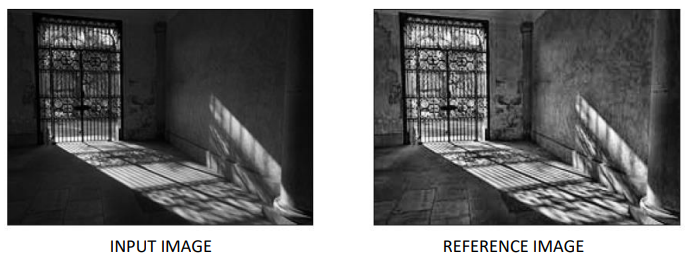


***Image Processing*** is a general image processing operator is a function that takes one or more input images and produces an output image.

***Pixel Transforms*** is kind of image processing transform, each output pixel's value depends on only the corresponding input pixel value (plus, potentially, some globally collected information or parameters). 

- ***Examples :*** brightness and contrast adjustments as well as color correction and transformations.

***Brightness :*** When the brightness is adjusted, the entire range of tones within the image is raised or lowered accordingly.

***Contrast :*** When the contrast adjustment is raised, the middle tones are eliminated. The image will have a higher percentage of darks or blacks and whites or highlights with minimal mid-tone.

***Import and show the original of input image using mpimg.imread function from cv2 library***

Original Dimensions :  (163, 258)


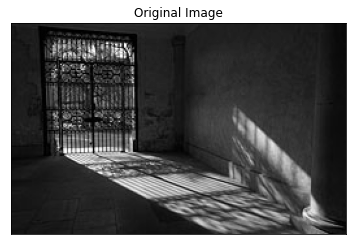

In [3]:
input_img = mpimg.imread('/content/input_image.jpg')
plt.title('Original Image')
plt.imshow(input_img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', input_img.shape)

***Import and show the reference image using mpimg.imread function from cv2 library***

Original Dimensions :  (163, 258)


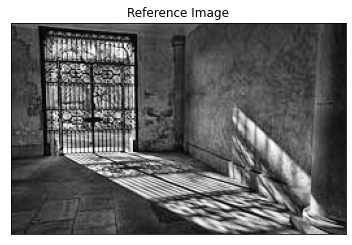

In [4]:
reference_img = mpimg.imread('/content/reference.jpg')
plt.title('Reference Image')
plt.imshow(reference_img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', reference_img.shape)

***Show the histograms from input image that have low contrast and reference image where the max min difference of the two images is not very noticeable***

Text(0, 0.5, 'Frequency')

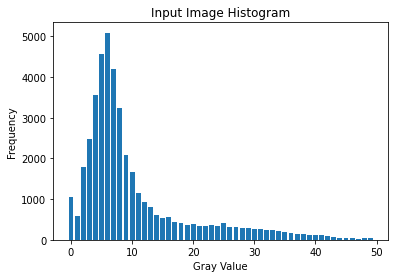

In [5]:
hist = cv2.calcHist([input_img], [0], None, [50], [0,256])
plt.bar(range(50), hist.ravel())
plt.title('Input Image Histogram')
plt.xlabel('Gray Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

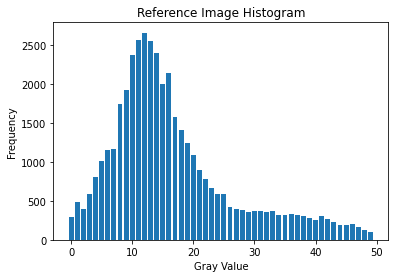

In [6]:
hist = cv2.calcHist([reference_img], [0], None, [50], [0,256])
plt.bar(range(50), hist.ravel())
plt.title('Reference Image Histogram')
plt.xlabel('Gray Value')
plt.ylabel('Frequency')

***Declare manipulate_image and new_image variables to manipulate input image has high contrast using zeros function and clup function from numpy library***

In [7]:
def manipulate_image(image, alpha, beta):
  new_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  return new_image

***Declare increase_contrast variables to accommodate manipulate_image variable which has parameters of alpha and beta***

In [8]:
increase_contrast = manipulate_image(input_img, 2.3, 1)

***Show the result and compare the contrast-enhanced input image with the reference image as input image with better contrast followed by histograms of both images***

Text(0.5, 1.0, 'Input Image Histogram with Better Contrast')

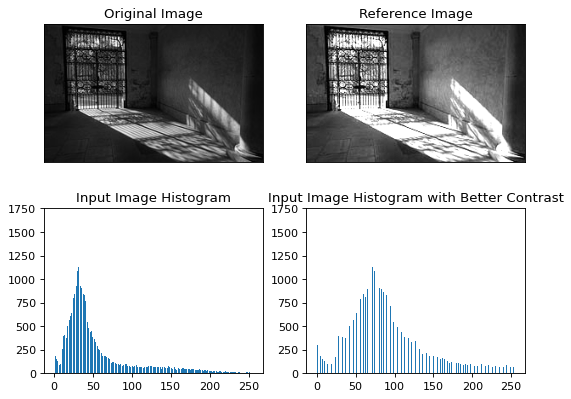

In [9]:
fig=plt.figure(figsize = (12, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')

plt.subplot(232), plt.imshow(input_img, cmap = 'gray')
plt.title('Original Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(233),plt.imshow(increase_contrast, cmap = 'gray')
plt.title('Reference Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([input_img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))
plt.title('Input Image Histogram')

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast], [0], None, [256], [0,256]).ravel())
plt.ylim((0, 1750))
plt.title('Input Image Histogram with Better Contrast')

***Conclusion***

Changing the brightness and contrast level of any image is the most basic thing that everyone does in image processing through image manipulation with the aim of changing the value of each pixel of an image by multiplying or dividing the pixel value of an image. In this case we increase the contrast level in the input image by increasing the intensity so that the input image contrast is better. This can be proven through the histograms of the two images, which can be seen the difference between the max and min values which initially became slightly larger after increasing the intensity.

### 2. Bandpass filters are useful for removing background noise as you can see in the below figure without completely eliminating the background information. A bandpass filter may be implemented by a spatial mask such as a Gaussian filter and the step will be as follows. The original image f(x, y) is first convolved with a spatial mask with a small variance to produce an output g1(x, y). Then It is convolved again with another spatial mask with a large variance to produce an output g2(x, y). The bandpass filter version of the input image is obtained as the difference between g1(x, y) – g2(x, y). The aforementioned steps are known as spatial filtering. However, if you are familiar with filtering process in the frequency domain, employing FFT (Fast Fourier Transform) will be a great help for you to complete the problem.

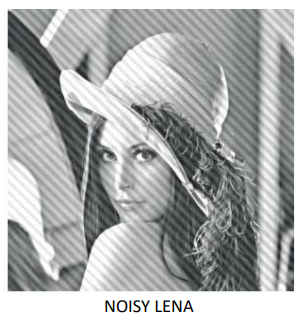

***Fast Fourier Transform (FFT)***

The Fast Fourier Transform is a convenient mathematical algorithm for computing the Discrete Fourier Transform. It is used for converting a signal from one domain into another. In the computer science the FFT is commonly used to transform an image between the spatial and frequency domain for perform routine image processing such as blurring, edge detection, thresholds, texture analysis and yes, even blur detection.

There are 3 types of FFT frequency domain, there are :

1. ***Low Pass Filter*** is the type of frequency domain filter that is used for smoothing the image. It attenuates the high frequency components and preserves the low frequency components. 

2. ***High Pass Filter*** is the type of frequency domain filter that is used for sharpening the image. It attenuates the low frequency components and preserves the high frequency components.

3. ***Band Pass Filter*** is  a filter that passes frequencies within a range and rejects frequencies outside that range. Which means that the only signal’s within this range can be passed by the Bandpass filter. Any signal which doesn’t fall within the specified range is rejected by the filter.

***Import and show the original image using mpimg.imread function from cv2 library***

Original Dimensions :  (306, 310, 4)


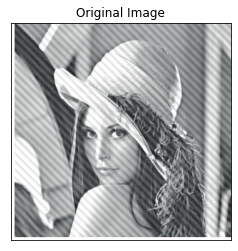

In [10]:
noisy_lena = mpimg.imread('/content/noisy_lena.png')
plt.title('Original Image')
plt.imshow(noisy_lena, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', noisy_lena.shape)

***Turn the original image into a grayscale image so that the image has only gray, black, and white colors using cvtColor function from cv2 library***

([], <a list of 0 Text major ticklabel objects>)

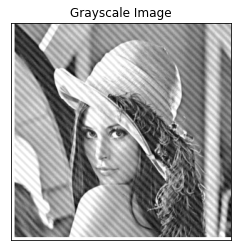

In [11]:
gray_img = cv2.cvtColor(noisy_lena, cv2.COLOR_BGR2GRAY)
plt.title('Grayscale Image')
plt.imshow(gray_img, cmap = 'gray'), plt.grid(False)
plt.xticks([])
plt.yticks([])

***Declare fft variable to perform Fast Fourier Transform on the grayscale image***

In [12]:
fft = np.fft.fft2(gray_img)

***Declare fshift variable to shifting the fft variable value to center***

In [13]:
fshift = np.fft.fftshift(fft)

***Declare mag_spectrum to calculating the magnitude spectrum***

In [14]:
mag_spectrum = np.log1p(np.abs(fshift))

***Declare x and y variables for accomodate the image shape***

In [15]:
x, y = gray_img.shape

***Declare gaussian_mag_spectrum variable to make new zero value with x timesy array using zeros function from numpy library***

In [16]:
gaussian_mag_spectrum = np.zeros((x, y), dtype = float)

***Declare thres variable as limit parameter and perform filter calculations with loops***

In [18]:
thres = 30
for a in range(x):
  for b in range(y):
    c = np.sqrt((a-x/2)**2 + (b-y/2)**2)
    gaussian_mag_spectrum[a, b] = np.exp(-c**2/(2*thres*thres))

***Perform the calculation to get the Gaussian Low Pass Filter Image, Fourier Spectrum Image and Spectrum of Gaussian Low Pass Filter Image***

In [19]:
gaussian_shift = fshift * gaussian_mag_spectrum
low = np.fft.fftshift(gaussian_mag_spectrum)
gaussian_LFP_img = np.abs(np.fft.ifft2(gaussian_shift))
gaussian_LPF_spectrum = np.log1p(np.abs(gaussian_shift))

***Show the comparison of original image with Gaussian Low Pass Filter Image, Fourier Spectrum Image and Spectrum of Gaussian Low Pass Filter Image***

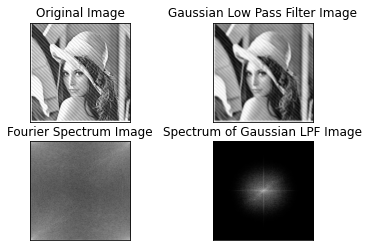

In [22]:
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap = 'gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(gaussian_LFP_img, cmap = 'gray')
plt.title('Gaussian Low Pass Filter Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(np.log(abs(fft)), cmap = 'gray')
plt.title('Fourier Spectrum Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.imshow(gaussian_LPF_spectrum, cmap = 'gray')
plt.title('Spectrum of Gaussian LPF Image')
plt.xticks([])
plt.yticks([])
plt.show()

***Perform the calculation to get the Gaussian High Pass Filter Image, Fourier Spectrum Image and Spectrum of Gaussian High Pass Filter Image***

In [23]:
high_shift = fshift -gaussian_shift
high = np.fft.fftshift(high_shift)
gaussian_HPF_img = np.abs(np.abs(np.fft.ifft2(high)+127))
gaussian_HPF_spectrum = np.log1p(np.abs(high_shift))

***Show a comparison of original image with Gaussian High Pass Filter Image, Fourier Spectrum Image and Spectrum of Gaussian High Pass Filter Image***

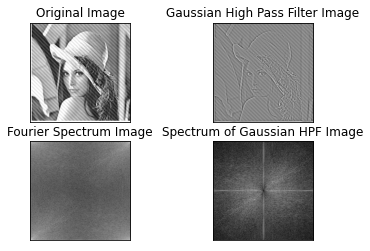

In [25]:
plt.subplot(2, 2, 1), plt.imshow(gray_img, cmap = 'gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(gaussian_HPF_img, cmap = 'gray')
plt.title('Gaussian High Pass Filter Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(np.log(abs(fft)), cmap = 'gray')
plt.title('Fourier Spectrum Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.imshow(gaussian_HPF_spectrum, cmap = 'gray')
plt.title('Spectrum of Gaussian HPF Image')
plt.xticks([])
plt.yticks([])
plt.show()

***Perform the calculation to get the Gaussian Band Pass Filter Image, Fourier Spectrum Image and Spectrum of Gaussian Band Pass Filter Image***

In [26]:
bandpass_shift = high_shift-gaussian_shift
band = np.fft.fftshift(bandpass_shift)
gaussian_bandpass_img = np.abs(np.abs(np.fft.ifft2(band)))
gaussian_bandpass_spectrum = np.log1p(np.abs(bandpass_shift))

***Show a comparison of original image with Gaussian Band Pass Filter Image, Fourier Spectrum Image and Spectrum of Gaussian Band Pass Filter Image***

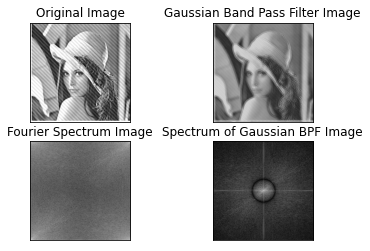

In [28]:
plt.subplot(2, 2, 1), plt.imshow(gray_img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(gaussian_bandpass_img, cmap = 'gray')
plt.title('Gaussian Band Pass Filter Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(np.log(abs(fft)), cmap = 'gray')
plt.title('Fourier Spectrum Image')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(gaussian_bandpass_spectrum, cmap = 'gray')
plt.title('Spectrum of Gaussian BPF Image')
plt.xticks([])
plt.yticks([])
plt.show()

***Conclusion***

In my opinion about Low Pass Filtering and High Pass Filtering in FFT (Fast Fourier Transform) are :

1. Low Pass Filtering passes image frequency of the frequency lower than the cut off frequency while High Pass Filtering passes image frequency of the frequency higher than the cut off frequency.

2. Low Pass Filtering helps in removal of aliasing effect cause it is used for smoothing the image while High Pass Filtering helps in removal of noise cause it is used for sharpening the image.

3. The initial of absolute value on the Low Pass Filtering will be multiplied by 0,255 while High Pass Filtering will be multiplied by 3.

While the main difference between Band Pass Filter from High Pass Filter and Low Pass Filter can be spotted by observing the magnitude response of the Band Pass Filter. The passband of the filter is of a specific range, which means that the only signal’s within this range can be passed by the Bandpass filter. Any signal which doesn’t fall within the specified range is rejected by the filter.

### 3. Give your thorough explanation on :

(A) Non-maximum suppression.

(B) Hysteresis thresholding in the Canny Edge Detector algorithm. Use diagram if necessary to show how both techniques are performed.

(C) Implement Canny and LOG approaches in python notebook and demonstrate the results. Give your analysis on both methods.

You may use relevant python libraries and a sample image of your choice.

***Edges***

Edges are significant local changes of intensity in a digital image. An edge can be defined as a set of connected pixels that forms a boundary between two disjoint regions. There are three types of edges: 

1. Horizontal edges
2. Vertical edges
3. Diagonal edges

Edge detection is one of the methods in image segmentation in Image processing. There are large numbers of edge detection operators available, each designed to be sensitive to edges. Variables involve in the selection of an edge detection operator include :

1. Edge orientation.
2. Noise environment.
3. Edge structure.

Edge detection allows users to observe the features of an image for a significant change in the gray level. This texture indicating the end of one region in the image and the beginning of another. It reduces the amount of data in an image and preserves the structural properties of an image. But edge detection is difficult to perform on noisy images, as noise and edges contain high frequency content. Therefore Attempts to reduce noise result in blurred and distorted edges using Operators which usually have a larger coverage, so they can average the same data. enough to ignore the localized noise pixels. Not all edges involve a step change in intensity. So there may be false edge detection issues, missing edge detection and noise issues etc.

***A). Non-Maximum Suppression***

This step aims at reducing the duplicate merging pixels along the edges to make them uneven. For each pixel find two neighbors in the positive and negative gradient directions, supposing that each neighbor occupies the angle of pi /4, and 0 is the direction straight to the right. If the magnitude of the current pixel is greater than the magnitude of the neighbors, nothing changes, otherwise, the magnitude of the current pixel is set to zero.


***B). Edge Tracking using Hysteresis Thresholding***

Since a weak edge pixel caused by true edges will be connected to a strong edge pixel, pixel W with weak gradient is marked as edge and included in the final edge map if and only if it is involved in the same connected component as some pixel S with strong gradient. In other words, there should be a chain of neighbor weak pixels connecting W and S (the neighbors are 8 pixels around the considered one). We will make up and implement an algorithm that finds all the connected components of the gradient map considering each pixel only once. After that, you can decide which pixels will be included in the final edge map.

There are 2 types of edge detection, there are :

***1. Canny Edge Detector***

The Canny edge operator is well debated as the optimal edge  detector.  The  canny  edge  detector  first  smoothes  the image to eliminate and noise. It then finds the image  gradient to   highlight   regions   with   high   spatial   derivatives.   The algorithm  then  tracks  along these regions and suppresses any pixel that is not at the maximum (non-maximum suppression).

1. In  order  to  implement  the  canny  edge  detector algorithm, a series of steps must be followed. The first step is to filter out any noise in the original image before trying to locate and detect any edges.
2. After smoothing the  image and eliminating the noise, the next step is to find the edge strength by taking the gradient of the image.
3. The direction of the edge is computed using the gradient in the x and y directions. However, an error will be generated when sum X is equal to  zero.
4. Once the edge direction is known, the next step is to relate the edge direction to a direction that can be traced in an  image.

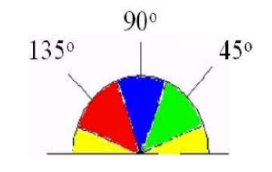

5. After   the   edge    directions   are    known,   non- maximum suppression now has to be applied. Non- maximum suppression is used to trace along the edge in the edge direction and suppress any pixel value (sets it equal to 0) that is not considered to be an edge. This will give a thin line in the output image. 
6. Finally,   hysteresis   is   used   as   a   means   of eliminating  streaking.  Streaking is   the  breaking   up  of   an edge contour caused by the operator output fluctuating above and below the threshold.

***- Advantages =***

1. It has good localization
2. It extract image features without altering the features
3. Less Sensitive to noise

***- Disadvantages  =***

1.   Time consumption is more.
2.   At times, it accounts false zero crossing that make computational complexity is more.

***2. Laplacian of Gaussian***

The Laplacian is a 2-D isotropic measure of the 2nd spatial derivative of an image. The Laplacian of an image highlights the regions of rapid intensity change and is therefore often used for edge detection. The Laplacian is often applied to an image that has first been smoothed with something approximating a Gaussian Smoothing filter in order to reduce its sensitivity to noise. This detector finds edges by looking for zero crossings after filtering f (x,y) with a Laplacian of Gaussian filter. In this method, the Gaussian filtering is combined with Laplacian to break down the image where the intensity varies to detect the edges effectively. It finds the correct place of edges and tests wider area and produces another gray level image as output.

The Laplacian L (x,y) of an image with pixel intensity values I (x,y) is given by :

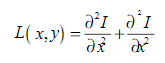


The  2-D LoG  function centred  on  zero  and  with  Gaussian standard deviation   has  the  form :](https://)

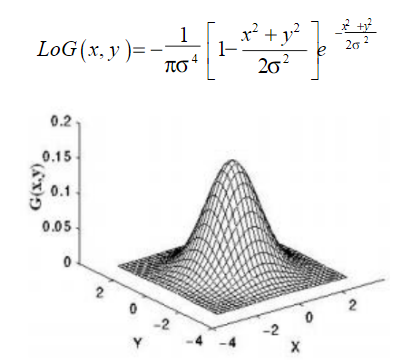

We have used Laplacian of Gaussian filtering with sigma = 1

***- Advantages =***

1. Easy to detect edges and their various orientations
2. There is fixed characteristics in all directions

***- Disadvantages  =***

1. Not very suitable where gray level intensity function varies.
2. The localization error may be in edge orientation or curved edges.
3. It generates noisy responses that do not correspond to edges, so-called *false edges*.

***Import the original image using mpimg.imread function from cv2 library. Here I use the digital retinal eye test image. I use this image because, this image can show a healthy retina, retinal blood vessels, diseased retina, optic disc and others that are part of the human body so it can be ascertained in great detail which in my opinion will produce a good difference in results for studied***

Original Dimensions :  (1064, 1500, 3)


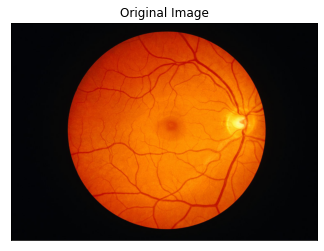

In [29]:
eye_image = mpimg.imread('/content/DigitalRetinalEyeTest.jpg')
plt.title('Original Image')
plt.imshow(eye_image, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', eye_image.shape)

***Turn the original image into a grayscale image so that the image has only gray, black, and white colors using cvtColor function from cv2 library***

([], <a list of 0 Text major ticklabel objects>)

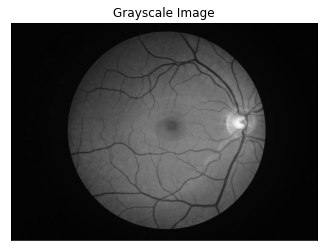

In [30]:
gray_eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_eye_image, cmap = 'gray')
plt.title('Grayscale Image')
plt.xticks([])
plt.yticks([])

***Apply noise reduction using a Gaussian Filter***

([], <a list of 0 Text major ticklabel objects>)

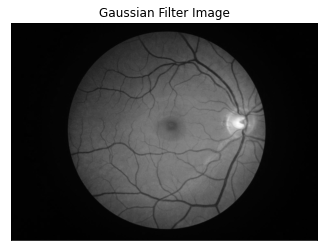

In [31]:
gaussian_eye_image = cv2.GaussianBlur(gray_eye_image,(5,5),0)
plt.imshow(gaussian_eye_image, cmap = 'gray')
plt.title('Gaussian Filter Image')
plt.xticks([])
plt.yticks([])

***Laplacian Edge Detector Method and Canny Edge Detector Method using scratch library***

***Search for X and Y magnitude gradients to see which areas have high spatial derivatives.***

***Perform the sobel process on the horizontal (X) axis using the sobel function from the cv2 library with the image parameter in the form of a gaussian image that we processed earlier***

In [32]:
sobelx_64 = cv2.Sobel(gaussian_eye_image, cv2.CV_32F, 1, 0, ksize = 3)
absx_64 = np.absolute(sobelx_64)

***Change it to 8 bits form to prevent overflow***

In [33]:
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

***Repeat the steps on vertical (Y) axis***

In [34]:
sobely_64 = cv2.Sobel(gaussian_eye_image, cv2.CV_32F, 0, 1, ksize = 3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

***After getting the X and Y gradients, declare mag variable to calculate the magnitude in 8 bits form***

In [35]:
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

***Declare theta variable to perform direction search using the arctan2 function from the numpy library in a 64 bit form***

In [36]:
theta = np.arctan2(sobely_64, sobelx_64)

***Declare angle variable to accomodate the value from theta that convert it to degrees using the rad2deg function from the numpy library***

In [37]:
angle = np.rad2deg(theta)

***Declare M and N variables to search for the closest pixel (B, C) then declare Non_max variable to apply Non-Maximum suppression to see if there were any false edges.***

In [38]:
M, N = mag.shape
Non_max = np.zeros((M,N), dtype = np.uint8)

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
        # Non-max Suppression
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

***Show the result of Non-Maximum Suppresion Image***

([], <a list of 0 Text major ticklabel objects>)

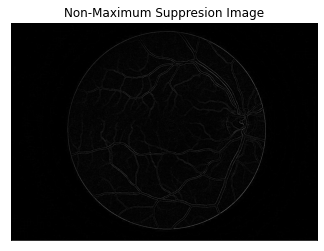

In [39]:
plt.imshow(Non_max, cmap = 'gray')
plt.title('Non-Maximum Suppresion Image')
plt.xticks([])
plt.yticks([])

***Perform Hysteresis Thresholding by applying double thresholding to separate the strong and the weak sides***

In [40]:
highThreshold = 21
lowThreshold = 15

***Declare M and N variables that set with a 2D matrix with a value of zero***

In [41]:
M, N = Non_max.shape
out = np.zeros((M,N), dtype= np.uint8)

***Apply two conditions with where function from numpy library where if the intensity is greater than the threshold then it is certain that there is an edge in the image while if it is smaller than the threshold then it is certain that there is no edge in the image***

In [42]:
strong_i, strong_j = np.where(Non_max >= highThreshold)
zeros_i, zeros_j = np.where(Non_max < lowThreshold)

***Apply other condition with where function from numpy library but just for weak edge in the image***

In [43]:
weak_i, weak_j = np.where((Non_max <= highThreshold) & (Non_max >= lowThreshold))

***Sets the same intensity value for all edge pixels in the image***

In [44]:
out[strong_i, strong_j] = 255
out[zeros_i, zeros_j ] = 0
out[weak_i, weak_j] = 75
M, N = out.shape
for i in range(1, M-1):
    for j in range(1, N-1):
        if (out[i,j] == 75):
            if 255 in [out[i+1, j-1],out[i+1, j],out[i+1, j+1],out[i, j-1],out[i, j+1],out[i-1, j-1],out[i-1, j],out[i-1, j+1]]:
                out[i, j] = 255
            else:
                out[i, j] = 0

***Show the comparison between the result of Laplacian Edge Detector Method Image and Canny Edge Detector Method Image using scratch library***

([], <a list of 0 Text major ticklabel objects>)

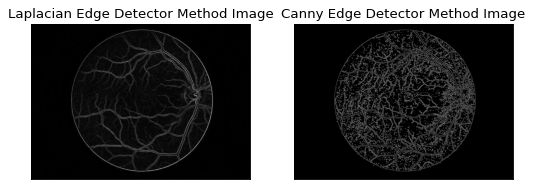

In [45]:
fig = plt.figure(figsize = (12, 6), dpi = 80, facecolor = 'w', edgecolor ='k')

plt.subplot(2,3,2)
plt.imshow(mag, cmap = 'gray')
plt.title('Laplacian Edge Detector Method Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(out, cmap = 'gray')
plt.title('Canny Edge Detector Method Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

***Laplacian Edge Detector Method and Canny Edge Detector Method using cv2 library***

***Declare laplacian_method variable to perform Laplacian Edge Detector Method using Laplacian function from cv2 library***

In [47]:
laplacian_method = cv2.Laplacian(gaussian_eye_image, ddepth = cv2.CV_64F, ksize = 3)
laplacian_method = cv2.convertScaleAbs(laplacian_method )

***Declare canny_method variable to perform Canny Edge Detector Method using Laplacian function from cv2 library***

In [48]:
Lower_threshold = 50
Upper_threshold = 100
canny_method = cv2.Canny(gaussian_eye_image, Lower_threshold, Upper_threshold)

***Show the comparison between the result of Laplacian Edge Detector Method Image and Canny Edge Detector Method Image using cv2 library***

([], <a list of 0 Text major ticklabel objects>)

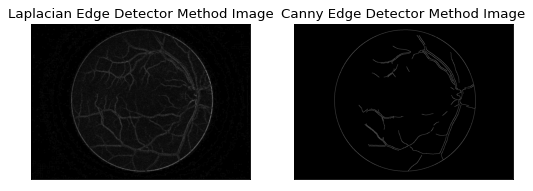

In [49]:
fig  =plt.figure(figsize = (12, 6), dpi = 80, facecolor = 'w', edgecolor = 'k')

plt.subplot(2,3,2)
plt.imshow(laplacian_method , cmap = 'gray')
plt.title('Laplacian Edge Detector Method Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(2,3,3)
plt.imshow(canny_method , cmap = 'gray')
plt.title('Canny Edge Detector Method Image')
plt.grid(False)
plt.xticks([])
plt.yticks([])

***Conclusion***

In my opinion the performance of Canny Edge Detector depends on the parameters like standard deviation and threshold value. The Canny Edge Detector operator albeit expensive in terms of computation is able to detect both strong and weak edges. It is necessary for proper diagnosis some malfunction that the operator intensively and thoroughly detects every point of edges. So, Canny Edge Detector is better than the Laplacian of Laplacian of Gaussian.

### 4. Using python notebook, demonstrate every single step of Harris corner algorithm based on the following steps (pick an image and a Gaussian filter of your own).

***Corner***

A corner is a point whose local neighborhood stands in two dominant and different edge directions. In other words, a corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness. Corners are the important features in the image, and they are generally termed as interest points which are invariant to translation, rotation, and illumination.

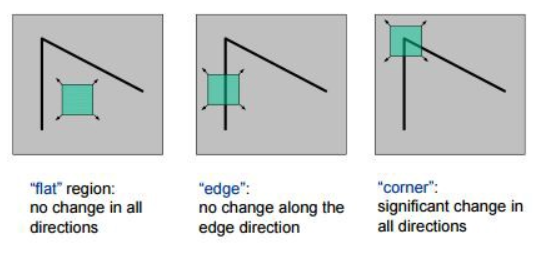

The idea is to consider a small window around each pixel p in an image. We want to identify all such pixel windows that are unique. Uniqueness can be measured by shifting each window by a small amount in a given direction and measuring the amount of change that occurs in the pixel values.

Let us define the change function E(u,v) as the sum of all the sum squared differences (SSD), where u,v are the x,y coordinates of every pixel in our 3 x 3 window and I is the intensity value of the pixel. The features in the image are all pixels that have large values of E(u,v), as defined by some threshold.

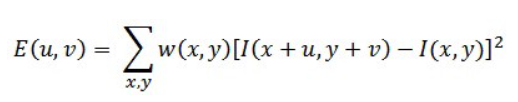

We have to maximize this function E(u,v) for corner detection. That means, we have to maximize the second term. Applying Taylor Expansion to the above equation and using some mathematical steps, we get the final equation as :

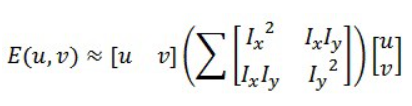

Now, we rename the summed-matrix, and put it to be M :

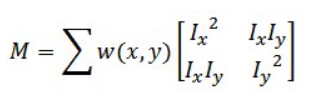

So the equation now becomes :

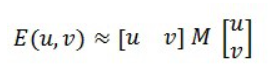

Remember that we want the SSD to be large in shifts for all eight directions, or conversely, for the SSD to be small for none of the directions. By solving for the eigenvectors of M, we can obtain the directions for both the largest and smallest increases in SSD. The corresponding eigenvalues give us the actual value amount of these increases. A score, R, is calculated for each window :

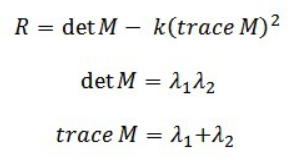

λ1 and λ2 are the eigenvalues of M. So the values of these eigenvalues decide whether a region is a corner, edge or flat whiches :

1. When |R| is small, which happens when λ1 and λ2 are small, the region is flat.
2. When R<0, which happens when λ1>>λ2 or vice versa, the region is an edge.
3. When R is large, which happens when λ1 and λ2 are large and λ1∼λ2, the region is a corner.

***Harris Corner Detection Algorithm***

Harris Corner Detection Algorithm was developed to identify the internal corners of an image. The corners of an image are basically identified as the regions in which there are variations in large intensity of the gradient in all possible dimensions and directions. Corners extracted can be a part of the image features, which can be matched with features of other images, and can be used to extract accurate information. Harris Corner Detection is a method to extract the corners from the input image and to extract features from the input image.

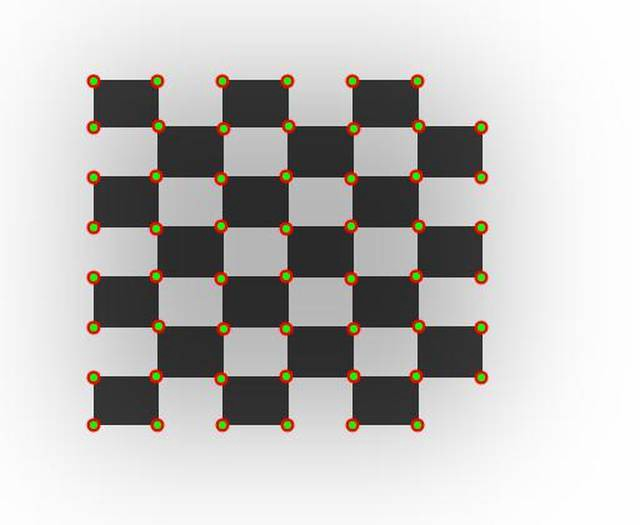

***First Implementation***

***Import the original image for edge detection using mpimg.imread function from cv2 library.. Here I use the honey comb image. I use this image because, it can show part of the picture from many angles through the sides of an honey comb in detail which in my opinion will produce a good difference in results for studied.***

Original Dimensions :  (1332, 2000, 3)


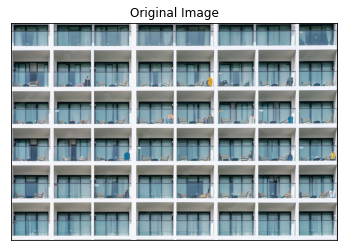

In [53]:
apart_img = mpimg.imread('/content/ApartementBalcony.jpg')
plt.title('Original Image')
plt.imshow(apart_img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', apart_img.shape)

***Specifies the kernel to perform convolution on the horizontal (X) and vertical (Y) axis then performs the transpose concept. Where kernel X is abT = axbT and kernel Y is baT = bxaT***

In [54]:
a = np.array([[-1,0,1]])
aT = np.transpose(a)
b = np.array([[1,1,1]])
bT = np.transpose(b)

abT = a*bT
baT = b*aT

***Declare Ix and Iy variables to convolve the image with kernel X and kernel Y using the filter2D function from cv2 library***

In [55]:
Ix = cv2.filter2D(apart_img, cv2.CV_32F, abT) # Ix = dI/dx
Iy = cv2.filter2D(apart_img, cv2.CV_32F, baT) # Iy = dI/dy

***Declare A and B variables to perform calculations by raising Ix and Iy with power of 2 and declare C variable to accommodate the results of Ix and Iy***

In [56]:
A = np.power(Ix,2)
B = np.power(Iy,2)
C = Ix*Iy

***Declare Ix_2, Iy_2 and IxIy variables to perform Gaussian Filter blur with a kernel size of 9X9 and a deviation of 2***

In [57]:
Ix_2 = cv2.GaussianBlur(A, (9,9), 2) # <Ix²> = g x Ix²
Iy_2 = cv2.GaussianBlur(B, (9,9), 2) # <Iy²> = g x Iy²
IxIy = cv2.GaussianBlur(C, (9,9), 2) # <IxIy> = g x IxIy

***Perform a Harris response calculation on the R function with zeros function from numpy library***

In [58]:
k = 0.04
height= apart_img.shape[0]
width = apart_img.shape[1] 
window_size = 3 
step = 1

Sxx = np.zeros((height,width))
Sxy = np.zeros((height,width))
Syy = np.zeros((height,width))
detM = np.zeros((height,width))
trM = np.zeros((height,width))

R = np.zeros((height,width)) 
M = np.zeros((height,width))
Max = np.zeros((height,width))
result = np.zeros((height,width))

max = 0

***Performing a square calculation on the gradient at each pixel by shifting the window to all pixels in our image***

In [59]:
for y in range(step, height-step):
    for x in range(step, width-step):
        # Shift the window
        windowIxx = Ix_2[y-step:y+step+1, x-step:x+step+1]
        windowIyy = Iy_2[y-step:y+step+1, x-step:x+step+1]
        windowIxy = IxIy[y-step:y+step+1, x-step:x+step+1]
        # Summation
        Sxx[y,x] = windowIxx.sum()
        Sxy[y,x] = windowIxy.sum()
        Syy[y,x] = windowIyy.sum()
        detM[y,x] = (Sxx[y,x] * Syy[y,x]) - (Sxy[y,x]**2) # Determinant calculation M
        trM[y,x] = Sxx[y,x] + Syy[y,x] # Trace calculation
        R[y,x] = detM[y,x] - k*(trM[y,x]**2) # Harris response calculation
        if R[y,x] > max:
            max = R[y,x] # Select max value in R

***Search local max value on the response function as non-maximum suppression concept***

In [60]:
def localMax(p,i,j) :  # Find local max value
        return ( p[i][j] > np.array([p[i-1][j],p[i][j-1],p[i-1][j-1],p[i+1][j],p[i][j+1],p[i+1][j+1],p[i-1][j+1],p[i+1][j-1]]).max())

***Search the corners using max value in R with loops***

In [61]:
for y in range(height-step) : # Find corners using max value in R
    for x in range(width-step) : 
        if R[y,x] > 0.04*max  and localMax(R,y,x) : 
            result[y,x] = 1 

***Show the result of Harris Corner Algorithm Image***

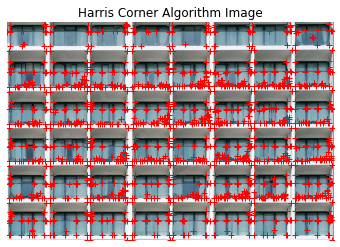

In [62]:
a, b = np.where(result == 1)
plt.plot(b, a, 'r+')
plt.title('Harris Corner Algorithm Image')
plt.imshow(apart_img, 'gray')
plt.axis('off')
plt.savefig('R_Output')
plt.show()


***Second Implementation with Non-Maximum Supression Method***

***Import the original image for edge detection using mpimg.imread function from cv2 library. Here I use the apartment balcony image. I use this image because, it can show part of the picture from many angles through the sides of an apartment building or apartment balcony in detail which in my opinion will produce a good difference in results for studied.***

Original Dimensions :  (1332, 2000, 3)


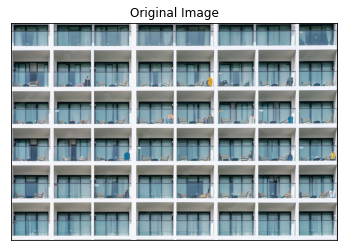

In [63]:
balcony_img = mpimg.imread('/content/ApartementBalcony.jpg')
plt.title('Original Image')
plt.imshow(balcony_img, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', balcony_img.shape)

***Make a copy of the original image***

In [64]:
image_copy = np.copy(balcony_img)

***Turn the original image into a grayscale image so that the image has only gray, black, and white colors***

([], <a list of 0 Text major ticklabel objects>)

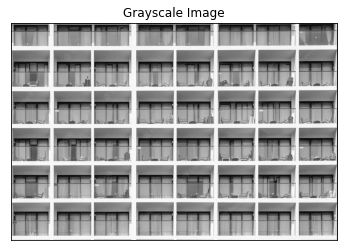

In [65]:
gray_image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image_copy, cmap = 'gray')
plt.title('Grayscale Image')
plt.xticks([])
plt.yticks([])

***Apply noise reduction using a Gaussian Filter***

([], <a list of 0 Text major ticklabel objects>)

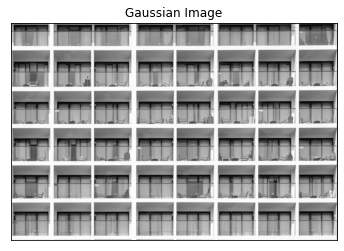

In [66]:
blur_image_copy = cv2.GaussianBlur(gray_image_copy,(5,5),0)
plt.imshow(blur_image_copy, cmap = 'gray')
plt.title('Gaussian Image')
plt.xticks([])
plt.yticks([])

***Search for X and Y magnitude gradients to see which areas have high spatial derivatives.***

***Perform the sobel process on the horizontal (X) axis using the sobel function from the cv2 library with the image parameter in the form of a gaussian image that we processed earlier***

In [67]:
sobelx_64 = cv2.Sobel(blur_image_copy,cv2.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)

***Change it to 8 bits form to prevent overflow***

In [68]:
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

***Repeat the steps on vertical (Y) axis***

In [69]:
sobely_64 = cv2.Sobel(blur_image_copy,cv2.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

***After getting the X and Y gradients, declare mag variable to calculate the magnitude in 8 bits form***

In [70]:
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

***Declare theta variable to perform direction search using the arctan2 function from the numpy library in a 64 bit form***

In [71]:
theta = np.arctan2(sobely_64, sobelx_64)

***Declare angle variable to accomodate the value from theta that convert it to degrees using the rad2deg function from the numpy library***

In [73]:
angle = np.rad2deg(theta)

***Declare M and N variables to search for the closest pixel (B, C) then declare Non_max variable to apply Non-Maximum suppression to see if there were any false edges.***

In [74]:
M, N = mag.shape
Non_max = np.zeros((M,N), dtype= np.uint8)

for i in range(1,M-1):
    for j in range(1,N-1):
       # Horizontal 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
        # Diagonal 45
        elif (22.5 <= angle[i,j] < 67.5) or (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
        # Vertical 90
        elif (67.5 <= angle[i,j] < 112.5) or (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
        # Diagonal 135
        elif (112.5 <= angle[i,j] < 157.5) or (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            
        # Non-max Suppression
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            Non_max[i,j] = mag[i,j]
        else:
            Non_max[i,j] = 0

***Show the result of Non-Maximum Suppresion Image***

([], <a list of 0 Text major ticklabel objects>)

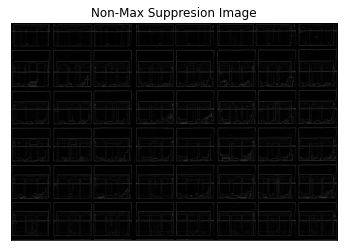

In [75]:
plt.imshow(Non_max, cmap = 'gray')
plt.title('Non-Max Suppresion Image')
plt.xticks([])
plt.yticks([])

***Declare dst variable to detect corners and dilate corner image to enhance corners points using cornerHarris function and dilate function from cv2 library***

In [76]:
dst = cv2.cornerHarris(gray_image_copy, 2, 3, 0.04)
dst = cv2.dilate(dst,None)

***Show the result of Detect Corner Image***

([], <a list of 0 Text major ticklabel objects>)

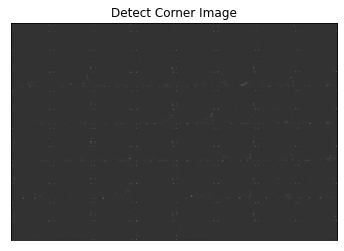

In [77]:
plt.imshow(dst, cmap = 'gray')
plt.title('Detect Corner Image')
plt.xticks([])
plt.yticks([])

***Declare threst variable that the value vary depending on the image and how many corners you want to detect. This free parameter can be change to 0.1 or to be larger or smaller***

In [78]:
thresh = 0.01*dst.max()

***Declare corner_image to create an image copy to draw corners on***

In [79]:
corner_image = np.copy(image_copy)

***Iterate through all the corners with loops, then draw them on the image if they pass the threshold***

In [80]:
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle(corner_image, (i, j), 1, (255, 0, 0), 1)

***Show the result of Harris Corner Algorithm Image using Non-Maximum Supression***

([], <a list of 0 Text major ticklabel objects>)

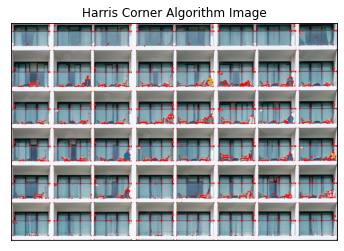

In [81]:
plt.imshow(corner_image)
plt.title('Harris Corner Algorithm Image')
plt.xticks([])
plt.yticks([])

***Conclusion***

The first implementation and the second implementation have the same concept, that using the Harris Corner Detection Algorithm. In my opinion, this algorithm is an improvement from the Moravec Corner Detection Algorithm which using a shift patches for every 45 degree angle rather takes the differential of the corner score into account with reference to direction directly. However, the difference between first implementation and the second implementation is that there is a Non-Maximum Suppression implementation step in second implementation. With this step, it is hoped that it will provide readers with enhance corners points that is easier to understand through images with minimum brightness. Where the results of the second implementation are influenced by the value of the threst variable whose value varies depending on the image and how many angles you want to detect. This free parameter can be changed to 0.1 or to be larger or smaller

### 5. Given some key-points in the image and their corresponding keypoints in the other image as they are shown in the below figures, compute homographic from random correspondences using RANSAC algorithm. As you may know already, the homographic array will be very useful for image alignment, image stitching and other application.

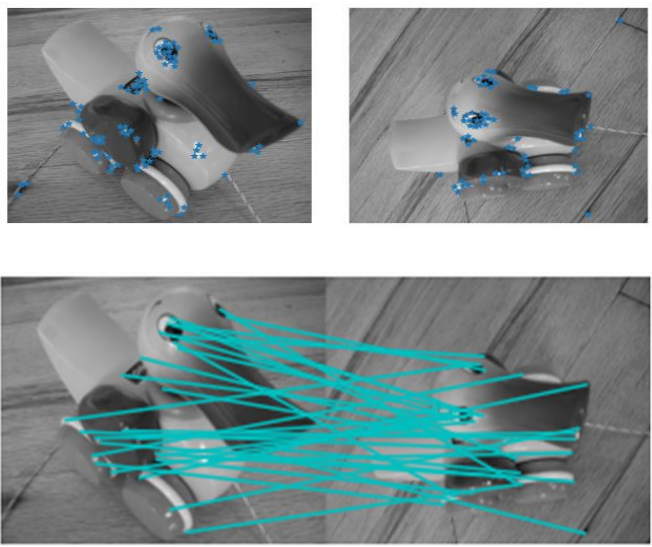

The Template Matching method is mostly static and the process works only if the template/subset image is exactly contained in the full/target image. Slight deviations like the direction change, image intensity change, scale changes will not go well with Template Matching and results in very poor results. This makes the Template Matching method of object detection less usable and doesn't make to real-world applications.

To overcome the above pitfalls of the Template Matching methods, SIFT (Scale Invariant Feature Transform) can be used. SIFT algorithm addresses the problems of feature matching with changing scale, intensity, and rotation. This makes this process more dynamic and the template image doesn’t need to be exactly contained in the full/main image. This is considered one of the best approaches for feature matching and is widely used.

There are 3 types of Features Matching Method, there are :

***1. Brute Force Matcher Method***

Brute-Force matcher (BFMatcher) method is simple. It takes the descriptor of one feature in first set and is matched with all other features in second set using some distance calculation. And the closest one is returned. For BFMatcher, first we have to create the BFMatcher object using cv2.BFMatcher(). It takes two optional params. First one is normType. It specifies the distance measurement to be used. By default, it is cv2.NORM_L2. It is good for SIFT, SURF etc (cv2.NORM_L1 is also there). For binary string based descriptors like ORB, BRIEF, BRISK etc, cv2.NORM_HAMMING should be used, which used Hamming distance as measurement. If ORB is using VTA_K == 3 or 4, cv2.NORM_HAMMING2 should be used.

Second param is boolean variable, crossCheck which is false by default. If it is true, Matcher returns only those matches with value (i,j) such that i-th descriptor in set A has j-th descriptor in set B as the best match and vice-versa. That is, the two features in both sets should match each other. It provides consistant result, and is a good alternative to ratio test proposed by D.Lowe in SIFT paper. Once it is created, two important methods are BFMatcher.match() and BFMatcher.knnMatch(). First one returns the best match. Second method returns k best matches where k is specified by the user. It may be useful when we need to do additional work on that.

Like we used cv2.drawKeypoints() to draw keypoints, cv2.drawMatches() helps us to draw the matches. It stacks two images horizontally and draw lines from first image to second image showing best matches. There is also cv2.drawMatchesKnn which draws all the k best matches. If k=2, it will draw two match-lines for each keypoint. So we have to pass a mask if we want to selectively draw it.

***2. FLANN Matcher Method***

FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works more faster than BFMatcher for large datasets. We will see the second example with FLANN based matcher. For FLANN based matcher, we need to pass two dictionaries which specifies the algorithm to be used, its related parameters etc. First one is IndexParams. For various algorithms, the information to be passed is explained in FLANN docs. While using ORB, you can pass the following. The commented values are recommended as per the docs, but it didn’t provide required results in some cases. Second dictionary is the SearchParams. It specifies the number of times the trees in the index should be recursively traversed. Higher values gives better precision, but also takes more time.

***3. RANSAC Algorithm***

RANSAC (Random sampling and consensus) Algorithm finds the landmarks by randomly sampling the laser readings and then using the using a least-squares approximation to find the best fit line that runs through these readings.
Steps to Perform Object Detection in python using OpenCV and SIFT, there are :

1. Load the train image and test image, do the necessary conversion between the RGB channels to make the image compatible while displayed using matplotlib.
2. Create ORB (Oriented fast and Rotated Brief) with the underlying SIFT algorithm.
3. Calculate the key points and descriptors for the train and test image separately.
4. Create the Brute Force matcher with the required parameters and here we use the KNN(K- nearest neighbor) matches which yields the Matches based on the similarity distances and let us further filter this out only considering if the distance between the two matches as good if the distance between them is 75%.
5. Use the good matches calculated in the above step to draw and highlight the matching areas.

***Import the original image for Sift Based Feature Match. Here I use two images of a sports car from Toyota,  the MK4 Supra series. I use both images because it can show parts of the image from many angles through the sides of the car body in detail, which in my opinion will produce a good difference in results for studied***

Original Dimensions :  (600, 600, 4)


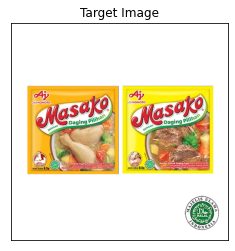

In [82]:
img_target = mpimg.imread('/content/Masako.jpg')
plt.title('Target Image')
plt.imshow(img_target, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', img_target.shape)

Original Dimensions :  (600, 450, 3)


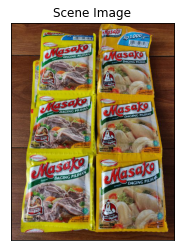

In [83]:
img_scene = mpimg.imread('/content/MasakoMasako.jpg')
plt.title('Scene Image')
plt.imshow(img_scene, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Original Dimensions : ', img_scene.shape)

***Turn both of the original images into a grayscale image so that the image has only gray, black, and white colors. Not only that, configure the size of both images by resizing the both of images so that it have the same size. So that later it will be easier to match between keypoints on the both of images***

Resized Dimensions :  (300, 300)


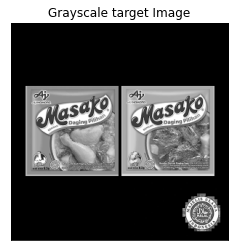

In [84]:
img_target= cv2.cvtColor(img_target, cv2.COLOR_BGR2GRAY)
img_target = cv2.resize(img_target, None, fx = 0.5, fy = 0.5)
plt.title('Grayscale target Image')
plt.imshow(img_target, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Resized Dimensions : ', img_target.shape)

Resized Dimensions :  (300, 225)


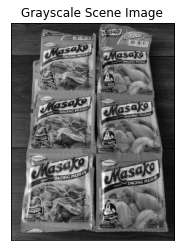

In [85]:
img_scene = cv2.cvtColor(img_scene, cv2.COLOR_BGR2GRAY)
img_scene = cv2.resize(img_scene, None, fx = 0.5, fy = 0.5)
plt.title('Grayscale Scene Image')
plt.imshow(img_scene, cmap = 'gray')
plt.xticks([])
plt.yticks([])
print('Resized Dimensions : ', img_scene.shape)

***Find the keypoints and the descriptors from the both of images using the sift_create function from the cv2 library and use the detectandcompute function from SIFT library to mark the keypoints***

In [86]:
SIFT = cv2.SIFT_create()
kp1, des1 = SIFT.detectAndCompute(img_target, None)
kp2, des2 = SIFT.detectAndCompute(img_scene, None)

***Show the keypoints of Taget Image 1***

([], <a list of 0 Text major ticklabel objects>)

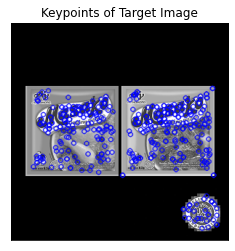

In [87]:
img_1 = cv2.drawKeypoints(img_target, kp1, 0, (0, 0, 255), flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)                              
plt.title('Keypoints of Target Image')
plt.imshow(img_1, cmap = 'gray')
plt.xticks([])
plt.yticks([])

***Show the keypoints of Scene Image 2***

([], <a list of 0 Text major ticklabel objects>)

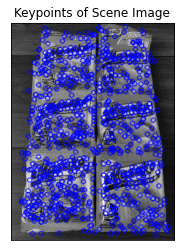

In [88]:
img_2 = cv2.drawKeypoints(img_scene, kp2, 0, (0, 0, 255), flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.title('Keypoints of Scene Image')
plt.imshow(img_2, cmap = 'gray')
plt.xticks([])
plt.yticks([])

***Declare FLANN_INDEX_KDTREE variable for FLANN parameter then declare index_params and search_params variables for dict function***

In [95]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

***Declare flann variable for perform feature matching using the FlannBasedMatcher function from cv2 libray with index_params and search_params variables as parameters and declare matches variable for keypoints with the knnMatch function on the flann function***

In [96]:
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k = 2)

***Make a test ratio with loops if the distance is less than 0.7 times the distance then matchesMask becomes 1.0***

In [90]:
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

***Perform masking and perform Homographic calculations of random correspondences where to find homographic function with the masking parameters of from Target Image and Scene Image with the RANSAC Algorithm and threshold functions from cv2 library***

In [91]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img_target.shape
pts = np.float32([ [0,0], [0,h-1], [w-1,h-1], [w-1,0] ]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts,M)
img_2 = cv2.polylines(img_scene,[np.int32(dst)], True, 255, 3, cv2.LINE_AA)

***Declare draw_params variable to draw lines between the keypoints from keypoint of Image 1 to keypoints of Image 2 then declare matchColor for the color parameter of the keypoints then declare singlePointColor for the color of the lines and the matchesMask variable as parameter also declare the flags which contains the DrawMatchesFlags function from cv2 library***

In [92]:
draw_params = dict(matchColor = (0,0, 255),
                   singlePointColor = None,
                   matchesMask = matchesMask,
                   flags = 2)

***Show the result of RANSAC Algorithm Image***

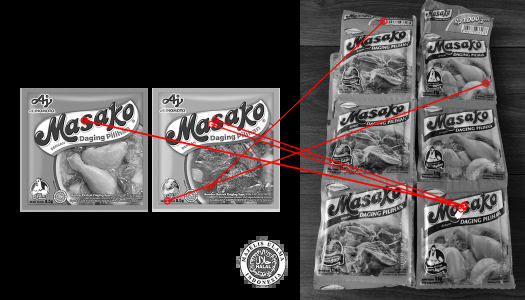

In [94]:
ransac = cv2.drawMatches(img_target, kp1, img_2, kp2, good, None, **draw_params)
cv2_imshow(ransac)

***Conclusion***

In my opinion FLANN method is much faster than BFMatcher method but it only finds an approximate nearest neighbor, which is a good matching but not necessarily the best. You can play with the parameters of FLANN in order to increase its speed or its precision. Then FLANN method builds an efficient data structure (KD-Tree) that will be used to search for an approximate neighbour, while BFMatcher method does an exhaustive search and is guaranteed to find the best neighbour. The real benefit of FLANN method is seen with large data sets.

End of Mid Test